## CHURN ANALYSIS - Segmentation Model using ANN

***'Model to predict whether the customer will leave the bank or not based on the observed data'***

### Important Packages

#Theano --> Numerical library for efficient numeric computation , works fine on GPU too
#Tensorflow --> Numerical computation , developed by google brain team
#keras --> kind of wraps Theano and Tensor flow ( very few line of required compare to other)

### Part 1.Data Preprocessing

In [16]:
#importing library
import numpy as np
import pandas as pd
pd.options.display.max_rows=999
pd.options.display.max_columns =999
import matplotlib.pyplot as plt

In [17]:
#Import dataset
df = pd.read_csv('/Users/arunramji/Downloads/Sourcefiles/Artificial_Neural_Networks/Churn_Modelling.csv')

In [18]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
#Assign Variable
X = df.iloc[:,3:13].values  #matrix of feature x
y = df.iloc[:,13].values  #dependent variabel vector
X,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0]))

In [20]:
X.shape

(10000, 10)

In [21]:
'''we need to convert all the categorical variable in to numeric variable to make use of them in 
neural network, We have only two categorical variable , let's encode them'''

#Encoding categorical variable from X and y
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

LabelEncoder_X_1 = LabelEncoder()  #instantiating object
X[:,1] = LabelEncoder_X_1.fit_transform(X[:,1])  #encoding country variable in X

LabelEncoder_X_2 = LabelEncoder()
X[:,2] = LabelEncoder_X_2.fit_transform(X[:,2]) #endcoding gender variable in X

In [22]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [23]:
#creating dummy variable for country as it has more than 2 posible values
#http://www.bzst.com/2014/03/the-use-of-dummy-variables-in.html -->dummy variable trap
ohe = OneHotEncoder(categorical_features=[1])
X = ohe.fit_transform(X).toarray()


/Users/arunramji/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
X[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
       0.0000000e+00, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [25]:
#removing one dummy variable to avoid dummy variable trap
X = X[:,1:]

In [26]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [27]:
#splitting the dataset in to training and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [28]:
#Feature scaling -- Mandatory in ANN to avoid computation cost
'''Since there gonna be lot of computation we may need to do feature scalling'''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
#Now preproccessing is over and all the independent variabel are scaled 
X_train

array([[-0.57504086,  1.74954671, -0.47559326, ..., -1.55056613,
        -1.02199176,  0.74416401],
       [-0.57504086,  1.74954671,  0.37371048, ...,  0.64492573,
        -1.02199176, -1.59596268],
       [-0.57504086, -0.57157662, -0.09237084, ...,  0.64492573,
         0.97848147,  0.02151338],
       ...,
       [ 1.73900686, -0.57157662,  0.67407399, ...,  0.64492573,
         0.97848147,  0.65484524],
       [-0.57504086, -0.57157662, -0.75524206, ...,  0.64492573,
         0.97848147,  0.72022509],
       [-0.57504086,  1.74954671,  0.02156015, ...,  0.64492573,
         0.97848147, -0.06269008]])

### Part 2 - Let's cook ANN

In [30]:
 #import keras libraries and modules 
import keras     #backend tensorflow by default

#sequential module required to initialise neural network
from keras.models import Sequential

#dense model required to build layers of ANN
from keras.layers import Dense 

#import dropout class if needed
from keras.layers import Dropout

### Recap ANN design Steps
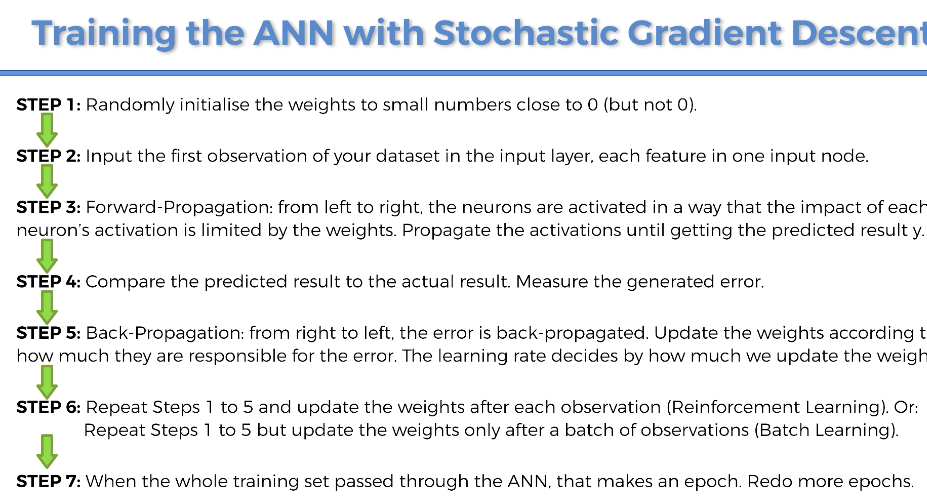

In [79]:
#initialising NN, we can do that by defining the graph or sequencial layer here we follow
#sequential

classifier = Sequential() 
#initialising ANN by defining sequence of layers, we named object 'clssifier' will be used as NN model that we gonna build


#adding input layer and fist hidden layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
classifier.add(Dropout(rate=0.1))  # rate -- what ratio of node should be ignored

'''
units - no.of nodes to use in hidden layer , one way of choosing no.of nodes is 
no.of input nodes+no.of output nodes / 2. 

activation - rectifier function for hidden so 'relu'

kernel_initializer - initialise weight close to 0 according to uniform distribution
 we will  use rectifier function of hidden layer and sigmoid function for output layer

input_dim - no.of nodes in the input layer , this is required only for the first layer of NN
'''

#adding second hidden layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))  # rate -- what ratio of node should be ignored


#adding ouput layer
# we are using sigmoid function for output layer so that we can get the output in 0 to 1 probability.
#incase we are have 3 or more dependent variable , we will have to 'softmax' activation function.
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))



'''
# --- stochastic gradient 'adam' algorithm used 
# --- loss function calculates lograthmic misclassification error, if dependent variables is binary , 
       we would use 'binary_crossentrophy' , if more than 2 the 'category_crossentrophy'
# --- 'mertics' is a criterian to choose the way how we gonna evaluate the model.       
'''
#compiling the ANN
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',
                  metrics=['accuracy'])

In [80]:
#fitting ANN to the training set
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

#batch_size - number of observation ,after which we wanna update the weight
#epochs - number of iteration we use to optimise the parameter

Epoch 1/100
8000/8000 [==============================] - 5s 580us/step - loss: 0.4777 - accuracy: 0.7981
Epoch 2/100
8000/8000 [==============================] - 3s 367us/step - loss: 0.4342 - accuracy: 0.7983
Epoch 3/100
8000/8000 [==============================] - 3s 364us/step - loss: 0.4291 - accuracy: 0.7983
Epoch 4/100
8000/8000 [==============================] - 3s 366us/step - loss: 0.4270 - accuracy: 0.7983
Epoch 5/100
8000/8000 [==============================] - 3s 408us/step - loss: 0.4248 - accuracy: 0.8167
Epoch 6/100
8000/8000 [==============================] - 3s 385us/step - loss: 0.4273 - accuracy: 0.8221
Epoch 7/100
8000/8000 [==============================] - 3s 384us/step - loss: 0.4279 - accuracy: 0.8229
Epoch 8/100
8000/8000 [==============================] - 3s 385us/step - loss: 0.4249 - accuracy: 0.8256
Epoch 9/100
8000/8000 [==============================] - 3s 392us/step - loss: 0.4250 - accuracy: 0.8251
Epoch 10/100
8000/8000 [==============================]

8000/8000 [==============================] - 3s 340us/step - loss: 0.4212 - accuracy: 0.8306
Epoch 79/100
8000/8000 [==============================] - 3s 353us/step - loss: 0.4211 - accuracy: 0.8319
Epoch 80/100
8000/8000 [==============================] - 3s 329us/step - loss: 0.4202 - accuracy: 0.8325
Epoch 81/100
8000/8000 [==============================] - 3s 336us/step - loss: 0.4207 - accuracy: 0.8320
Epoch 82/100
8000/8000 [==============================] - 3s 364us/step - loss: 0.4189 - accuracy: 0.8332
Epoch 83/100
8000/8000 [==============================] - 3s 351us/step - loss: 0.4194 - accuracy: 0.8290
Epoch 84/100
8000/8000 [==============================] - 3s 350us/step - loss: 0.4209 - accuracy: 0.8304
Epoch 85/100
8000/8000 [==============================] - 3s 340us/step - loss: 0.4226 - accuracy: 0.8291
Epoch 86/100
8000/8000 [==============================] - 3s 415us/step - loss: 0.4206 - accuracy: 0.8324
Epoch 87/100
8000/8000 [==============================] - 3

### Part 3 - Predicting test set

In [32]:
#predicting test set
y_pred = classifier.predict(X_test)

In [35]:
prediction = pd.DataFrame(y_pred,columns=['probability'])
prediction[prediction['probability']>0.5]

,probability
4,0.682905
41,0.609633
58,0.831097
68,0.744889
91,0.865831
92,0.767344
141,0.514982
142,0.728017
151,0.734692
158,0.628105


In [37]:
y_pred = y_pred > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1541,   36],
       [ 277,  146]])

In [40]:
#prediction accuracy with  test set
((1541+146)/len(y_test)) * 100   #NUMBER OF CORRECT PREDICTION / TOT.NO.OF OBSERVATION

84.35000000000001

In [41]:
#predict for new observation 
'''Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000'''


'Geography: France\nCredit Score: 600\nGender: Male\nAge: 40 years old\nTenure: 3 years\nBalance: $60000\nNumber of Products: 2\nDoes this customer have a credit card ? Yes\nIs this customer an Active Member: Yes\nEstimated Salary: $50000'

In [42]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [48]:
#check categorical variables assigned values from x_test matrix and use the same
# then make sure do feature scalling as it was done for model building(sc.transform used here)

predict_new = classifier.predict(sc.transform(np.array([[0,0,600,0,40,3,60000,2,1,1,50000]])))
if predict_new<0.5:
    print(predict_new)
    print("Based on the above probability ,statistically customer won't be leaving our service")

[[0.3692731]]
Based in the above probability ,statistically customer won't be leaving our service


###  K-fold cross validation
Though evaluating model accuracy based on test set is ok , it may vary slightly each time we run the model, so to comeup with right way of evaluating model will ensure that we can expect the similar accuracy for unknow data also , hence we are using k-fold cross validation to over come the high variane and to  know the right approximation of accuracy of model which is better than traditional one. 

In K-fold cross validation we will split the test set in to k folds(generally 10 folds),and we train the model on 9 folds and test it on last remaining fold , in that way we will be having 10 combination of train/test set .
then we can evaluate all by taking average and std.dev of accuracy and using that it is easier to evaluate the bias and variance of the model.
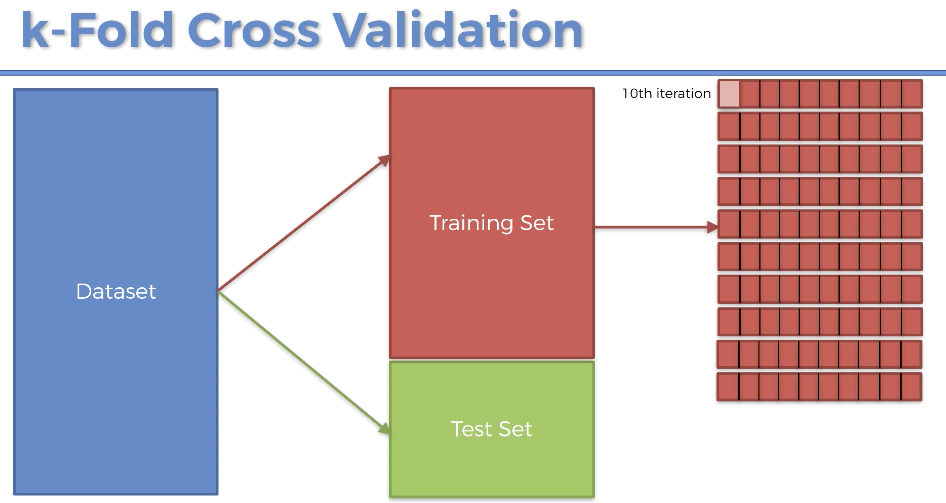




### "<font color=blue>***Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data***</font> "

In [72]:
#k-fold validation 
#has to be done right after data preprocessing

#Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense 


In [73]:
def build_classifier():   #one of the parameter for KerasClassifier method
    
    classifier = Sequential() #initialising ANN by defining sequence of layers
    
    #adding input layer and fist hidden layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
    
    #adding second hidden layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
    
    #compiling the ANN
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',
                      metrics=['accuracy'])
    return classifier

In [74]:
#fitting model for k-fold cross validation
classifier = KerasClassifier(build_fn = build_classifier,nb_epoch = 100,
                            batch_size=10)  
accuracies = cross_val_score(estimator=classifier,X = X_train, y = y_train, cv=10,
                            n_jobs=-1)

In [75]:
accuracies

array([0.81      , 0.80500001, 0.82499999, 0.79874998, 0.79250002,
       0.79624999, 0.77625   , 0.79500002, 0.80624998, 0.82749999])

In [76]:
mean = np.mean(accuracies)
mean

0.8032499969005584

In [77]:
variance = np.std(accuracies)
variance

0.014493526518217337

# Improving ANN

one of way of improving ANN for acheiving more accuracy is drop out regularization to reduce overfitting if required  .

## 1. Drop Out
Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random

A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.

Implemented the same above while we train the model

In [85]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 2.Parameter Tuning 

Another way of imporoving the ANN is prameter tuning . there are two types of parameter we use in our model , one is weights which are estimated by model and another parameters like 1. number of epoch, 2. number of nodes , 3. batch size 4. optimiser , these are all predefined <font color = red>"hypper parameter"</font> .

we may have to adjust these values to incerase the efficiency of the ANN  .

One technique of doing parameter tuning is <font color = red>*'grid search'* </font> which will test the different combination of these hyperparameter and choose the one which has higher accuracy .

In [35]:
#tuning ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense 


def build_classifier(optimizer):   #one of the parameter for KerasClassifier method
    
    classifier = Sequential() #initialising ANN by defining sequence of layers
    
    #adding input layer and fist hidden layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))
    
    #adding second hidden layer
    classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
    classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
    
    #compiling the ANN
    classifier.compile(optimizer = optimizer,loss = 'binary_crossentropy',
                      metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)  # epoch and batch size not included as we are going to estimate it using tuning

#dictionary with all the combination of Hyper parameters
param = {'batch_size':[25,32],
         'nb_epoch':[100,500],
         'optimizer':['rmsprop','adam']}

grid_search = GridSearchCV(estimator = classifier
                           ,param_grid = param,scoring='accuracy'
                          ,cv=10)

grid_search = grid_search.fit(X_train,y_train)

#best param and accuracy
best_param = grid_search.best_params_
best_acc = grid_search.best_score_

Epoch 1/1
7200/7200 [==============================] - 2s 269us/step - loss: 0.5850 - accuracy: 0.7956
Epoch 1/1
7200/7200 [==============================] - 2s 303us/step - loss: 0.5775 - accuracy: 0.7965
Epoch 1/1
7200/7200 [==============================] - 2s 287us/step - loss: 0.5843 - accuracy: 0.7950
Epoch 1/1
7200/7200 [==============================] - 2s 300us/step - loss: 0.5842 - accuracy: 0.7974
Epoch 1/1
7200/7200 [==============================] - 2s 310us/step - loss: 0.5945 - accuracy: 0.7965
Epoch 1/1
7200/7200 [==============================] - 2s 316us/step - loss: 0.5755 - accuracy: 0.7981
Epoch 1/1
7200/7200 [==============================] - 3s 356us/step - loss: 0.5728 - accuracy: 0.8004
Epoch 1/1
7200/7200 [==============================] - 3s 348us/step - loss: 0.5803 - accuracy: 0.7972
Epoch 1/1
7200/7200 [==============================] - 2s 325us/step - loss: 0.5582 - accuracy: 0.8001
Epoch 1/1
7200/7200 [==============================] - 2s 240us/step - lo

In [36]:
best_param

{'batch_size': 25, 'nb_epoch': 100, 'optimizer': 'rmsprop'}

In [37]:
best_acc

0.79825